# <font color='blue'>Técnicas de Reducción de Varianza


En las simulaciones Monte Carlo, como en otras técnicas de muestreo <font color='red'> el error es proporcional a $\frac{1}{\sqrt{N}}$, siendo $N$ el tamaño de la muestra.</font>

Si consideramos la **precisión** como proporcional a la desviación estándar, entonces se sigue que la cantidad de trabajo computacional requerido varía con el cuadrado de la precisión deseada.

Los **métodos de reducción de varianza** buscan reducir esa constante de proporcionalidad para aumentar la precisión sin tener que aumentar el trabajo computacional.

Entre esos métodos, podemos mencionar:

* Variables antitéticas.
* Muestreo Importancia.
* Muestreo estratificado. 
* Variables de control.
* Monte Carlo condicional.

## <font color='blue'> Variables Antitéticas

Esta técnica se basa en el uso del teorema:

$$Var(\frac{X_1+X_2}{2})=\frac{1}{4}[Var(X_1)+Var(X_1)+2Cov(X_1+X_2)]$$

Supongamos que $\hat{\theta_1}$ es un estimador insesgado del párametro $\theta$ y que además $\hat{\theta_1}$ es una función de $m$ números aleatorios $R_1, ..., R_m$. Debido a que $1 - R_m$ sigue la misma distribución que $R_m$ (ambos $U(0,1)$), podemos construir otro estimador simplemente sustituyendo $R_m$ por $1-R_m$.  

Consideremos la estimación de la integral:

 <font color='red'> $$\mathcal{I}=\int_0^1 \frac{1}{1+x} dx$$

## Ejercicio:

* Calcular el valor exacto de esta integral.

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{m} \Big( \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m} \Big)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos la función de prueba.
def funcion(x):
    return 1.0/(1+x) 

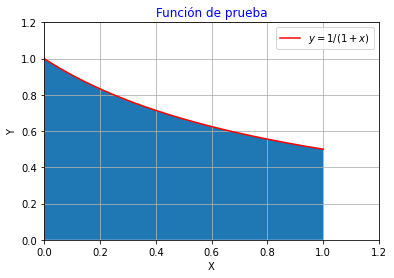

In [3]:
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.plot(X,funcion(X), color='red', label="$y=1/(1+x)$")
plt.fill_between(X,funcion(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{m} \Big( \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m} \Big)$$

In [4]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.68923
El error estándar es: 0.00254


In [5]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(1-u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n), suma

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69583
El error estándar es: 0.00255


In [6]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)


In [7]:
def mc_crudo(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))
  
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

In [8]:
def mc_crudo1(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=funcion(u)
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

El valor de la integral es: 0.69104
El error estándar es: 0.00438


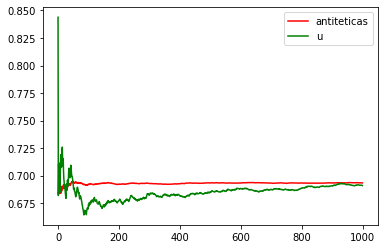

In [9]:
X1=mc_crudo1(funcion, n=1000)[2]
X=mc_crudo(funcion, n=1000)[2]

plt.plot(X, color='red', label='antiteticas')
plt.plot(X1, color='green', label='u')
plt.legend()

Supongamos que $\hat{\theta_1}$ es un estimador insesgado del párametro $\theta$ y que además $\hat{\theta_1}$ es una función de $m$ números aleatorios $R_1, ..., R_m$. Debido a que $1 - R_m$ sigue la misma distribución que $R_m$ (ambos $U(0,1)$), podemos construir otro estimador simplemente sustituyendo $R_m$ por $1-R_m$.  

## <font color='blue'> Variables de control

Aplicamos esta técnica cuando al estimar el parámetro $\theta$ mediante la variable aleatoria $X$ también contamos con otra variable $Y$, con $E(Y) = \mu_y$.

La variable:

$$Z = X + c(Y-\mu_y)$$

tiene el mismo valor esperado que $X$ para todo $c$.

La idea de esta técnica consiste en encontrar el valor $c$ que haga la varianza lo más pequeña posible.

$$V(Z)=V(x)+2cCov(X,Y)+ c^2V(Y)$$

Que tiene un mínimo para 

$$c= -\frac{Cov(X,Y)}{V(Y)}$$

Y ese mínimo tiene el valor:
    
$$V(Z)=V(X)-\frac{Cov(X,Y)^2}{V(Y)}$$

Y recordando que el coeficiente de correlación entre $X$ y $Y$ es:

$$r_{XY}=\frac{Cov(X,Y)}{\sqrt{V(X)V(Y)}}$$

Se tiene:

$$V(Z)=V(X)(1-r_{XY})$$

### Ejemplo

Calcular $\int_0^1 \frac{1}{1+x^2}dx$

Si usamos el método de Monte Carlo crudo (o de la media muestral) para estimar esta integral, nuestro estimador es:
    
$$X=\frac{\frac{1}{1 + U_1^2}+...+\frac{1}{1 + U_n^2}}{n}$$

La variable de control puede ser

$$Y=\frac{U_1+...+U_n}{n}$$

### Ejercicio:

Comprobar que $Cov(X,Y)=\frac{\frac{log(2)}{2}-\frac{\pi}{8}}{n}$

y

$c=-12 \frac{log(2)}{2}-\frac{\pi}{8}=0.5535$

Aquí completamos el ejercicio.

In [10]:
#Definimos la función de prueba.
def funcion(x):
    return 1.0/(1+x**2) 

In [11]:
def integ(func=funcion, n=10000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.78559
El error estándar es: 0.00161


In [12]:
def integ_control(func=funcion, n=10000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u) + 0.5535*(u - 0.5)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ_control()[0],5))
print("El error estándar es:", round(integ_control()[1],5))

El valor de la integral es: 0.78516
El error estándar es: 0.00018


La reducción es de un 90% aprox.

## <font color='blue'> Muestreo de Importancia

Si se desea estimar, a partir de la variable simulada $X$:

$$\theta = \mathbb{E}[h(X)] = \int h(X)f(X) dX$$

Observamos que $X$ se está simulando con una función de densidad $f(X)$.

Si $g(x)$ es otra densidad de probabilidad, tal que $f(x)=0$ siempre que $g(x)=0$, entonces podemos expresar $\theta$ como:

$$\theta = \mathbb{E_g}[\frac{h(X)f(X)}{g(X)}] = \int \frac{h(X)f(X)}{g(X)} g(X) dX$$

La idea es elegir una función $g(x)$ de modo que la variable aleatoria $\frac{h(X)f(X)}{g(X)}$ tenga una varianza pequeña. Para ello se suele elegir una función que se parezca a $h(x)f(x)$ para que el muestreo se haga en las partes "más importantes" de la función.

## Ejemplo:

Estimar $\int_0^{\pi} x sen(x) dx$

Para entender el problema, primero graficamos la función a integrar.

Example: Calculate ∫sin(x)xdx
 
The function has a shape that is similar to Gaussian and therefore
we choose here a Gaussian as importance sampling distribution.

In [13]:
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [14]:
mu = 2
sig = 0.7

f = lambda x: np.sin(x)*x           # función de prueba

infun = lambda x: np.sin(x)-x*np.cos(x)    #integral de la función de prueba

p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2)) # funcion normal: elegida por el parecido con f.

normfun = lambda x: norm.cdf(x-mu, scale=sig)

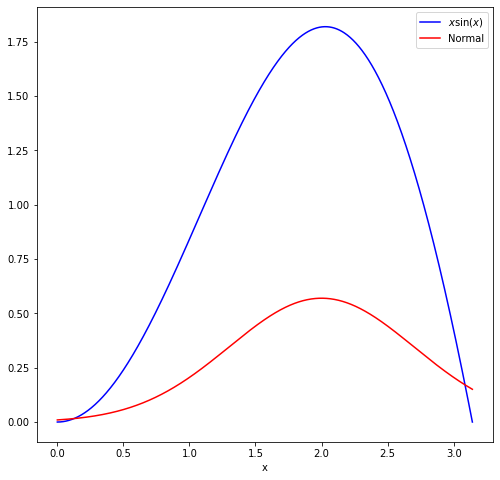

In [16]:
xmax =np.pi   #
xmin =0
 
x=np.linspace(xmin, xmax, 1000)

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(x, f(x), 'b', label='$x\sin(x)$')
plt.plot(x, p(x), 'r', label='Normal') #Función G
plt.xlabel('x')
plt.legend()

Podemos calcular el valor exacto de la integral:

In [17]:
I = infun(xmax) - infun(xmin)
print(I)

3.141592653589793


Estimamos la integral por Monte Carlo Crudo:

In [18]:
N =1000   # Tamaño de la muestra

I_mc = np.zeros(1000)

for k in np.arange(0,1000):
  x = np.random.uniform(low=xmin, high=xmax, size=N)

  I_mc[k] = (xmax-xmin)*np.mean(f(x))
    
print(np.mean(I_mc))

3.1420602029527216


Y también la estimamos por muestreo importancia, usando la función normal.

3.1550168869183977


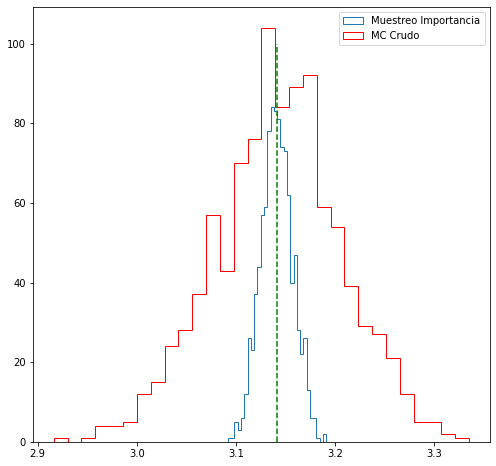

In [19]:
Iis = np.zeros(1000)
for k in np.arange(0,1000):
                                                  # xis~N(mu,sig^2)
  xis = mu + sig*np.random.randn(N,1)
  xis = xis[ (xis<xmax) & (xis>xmin)] 
                                                   # normalizacion de gaussian from 0..pi
  normal = normfun (np.pi) - normfun (0)           # Nota: La integral de la función de densidad  en [0 pi] es 1
  Iis[k] = np.mean (f (xis) / p (xis)) * normal    # Por lo tanto, multiplicar por un coeficiente.

print(np.mean(Iis[k]))

plt.figure(figsize=(18,8))
plt.subplot(1,2,2)
plt.hist(Iis,30, histtype='step', label='Muestreo Importancia')
plt.hist(I_mc, 30, color='r',histtype='step', label='MC Crudo')
plt.vlines(np.pi, 0, 100, color='g', linestyle='dashed')
plt.legend()
plt.show()

## <font color='blue'> Jakknife

In [20]:
import random
import statistics 
import matplotlib.pyplot as plt

In [21]:
PopData = list()

random.seed(5)

for i in range(100):
    DataElem = 10 * random.random()
    PopData.append(DataElem)

In [22]:
PopData

[6.229016948897019,
 7.417869892607294,
 7.951935655656967,
 9.424502837770504,
 7.398985747399307,
 9.22324996665417,
 0.29005228283614737,
 4.656226543781053,
 9.433567169983137,
 6.489745531369242,
 9.009004917506227,
 1.1320596465314436,
 4.690690477821637,
 2.4657283261983034,
 5.437608592359304,
 5.739411879281008,
 0.13114189588902203,
 2.1672980046384813,
 2.794823660111103,
 9.163453718085519,
 7.657254516291418,
 1.5960421235803823,
 7.971469914312045,
 1.3876741839890316,
 6.174525204661166,
 1.2669923255026971,
 0.01774862202534644,
 8.714047447242821,
 2.094563824951179,
 2.1548116922473226,
 9.824211088259252,
 8.724077654368019,
 2.893051677469265,
 9.614779889500834,
 5.392234688708106,
 6.778304772505923,
 2.047795145337928,
 9.40976001087999,
 6.906419411069082,
 9.665643123171954,
 8.937416775764785,
 2.9878889785386775,
 3.6118993472238414,
 1.659560571297456,
 1.4570190954068252,
 0.6513971337567626,
 3.013591007694625,
 6.031099974076543,
 0.03383119374356758,
 6.

In [27]:
#Calculando el coeficiente de variación
def CVCalc(Dat):
    CVCalc = statistics.stdev(Dat)/statistics.mean(Dat) 
    return CVCalc

In [28]:
CVPopData = CVCalc(PopData)
print(CVPopData)

0.6569398125747403


In [29]:
N = len(PopData)
JackVal = list()
PseudoVal = list()
for i in range(N-1):
    JackVal.append(0)
for i in range(N):
    PseudoVal.append(0)

for i in range(N):
    for j in range(N):
        if(j < i): 
            JackVal[j] = PopData[j]
        else:
            if(j > i):
                JackVal[j-1]= PopData[j]
    PseudoVal[i] = N*CVCalc(PopData)-(N-1)*CVCalc(JackVal)

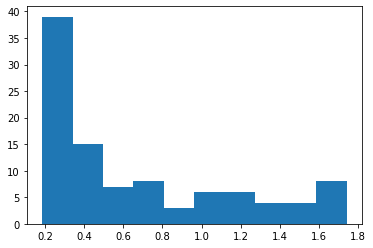

In [30]:
plt.hist(PseudoVal)
plt.show()

In [31]:
MeanPseudoVal=statistics.mean(PseudoVal)
print(MeanPseudoVal)

0.6545985339842991


In [32]:
VariancePseudoVal=statistics.variance(PseudoVal)
print(VariancePseudoVal)

0.2435929299444099


In [33]:
MeanPseudoVal=statistics.mean(PseudoVal)
print(MeanPseudoVal)

0.6545985339842991


## <font color='blue'> Bootstrap

In [34]:
import random
import numpy as np 
import matplotlib.pyplot as plt

In [35]:
PopData = list()

random.seed(7)

for i in range(1000):
    DataElem = 50 * random.random()
    PopData.append(DataElem)

In [36]:
PopData

[16.19163824165812,
 7.542458696225096,
 32.546723651992686,
 3.621814333377138,
 26.79410021533446,
 18.28444584562928,
 2.8999462387353403,
 25.371786659471013,
 1.874782922099244,
 21.682284183119293,
 3.492771178730947,
 4.535650667193253,
 21.225959457125697,
 41.342606233601906,
 6.190098057482279,
 11.161948230350728,
 31.371661120279466,
 47.38544712285028,
 28.855147430874933,
 19.83402373253901,
 48.812755279646005,
 2.329134030887814,
 42.923422952433974,
 14.480464316583813,
 7.212754167871877,
 5.889611903918418,
 15.424091205096719,
 40.80631795600157,
 9.036318996196874,
 29.08000818312331,
 31.945673446309204,
 18.61987713628656,
 27.38722328547789,
 3.1394487486661573,
 2.980058498311633,
 10.297935640966326,
 34.019998659089296,
 21.379615283470145,
 15.707358518839577,
 29.278093175381937,
 22.65921881853877,
 14.988349843184118,
 39.71897407612456,
 34.94972168647856,
 12.204825536107645,
 28.721185512933552,
 26.25982519057257,
 43.756874778671445,
 36.472264471960

In [37]:
PopSample = random.choices(PopData, k=100)

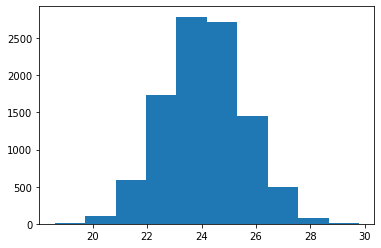

In [38]:
PopSampleMean = list()
for i in range(10000):  
    SampleI = random.choices(PopData, k=100)
    PopSampleMean.append(np.mean(SampleI))

plt.hist(PopSampleMean)
plt.show()

In [39]:
MeanPopSampleMean = np.mean(PopSampleMean)
print("The mean of the Bootstrap estimator is ",MeanPopSampleMean)

The mean of the Bootstrap estimator is  24.105354873028915


In [40]:
MeanPopData = np.mean(PopData)
print("The mean of the population is ",MeanPopData)

The mean of the population is  24.087053989747968


In [41]:
MeanPopSample = np.mean(PopSample)
print("The mean of the simple random sample is ",MeanPopSample)

The mean of the simple random sample is  23.140472976536497
